智能优化算法受到人类智能、生物群体社会性或自然现象规律的启发，主要包括以下几种类型：

    进化类算法：
        遗传算法：模仿自然界生物进化机制。
        差分进化算法：通过群体个体间的合作与竞争来优化搜索。
        免疫算法：模拟生物免疫系统学习和认知功能。

    群体智能算法：
        蚁群算法：模拟蚂蚁集体寻径行为。
        粒子群算法：模拟鸟群和鱼群群体行为。

除了以上常见的算法外，还有许多其他群体智能优化算法，例如：萤火虫算法、布谷鸟算法、蝙蝠算法、狼群算法、烟花算法、合同网协议算法等等。

    模拟退火算法：源于固体物质退火过程。
    禁忌搜索算法：模拟人类智力记忆过程。
    神经网络算法：模拟动物神经网络行为特征。

Scikit-opt 封装了 7 种启发式算法，分别是差分进化算法、遗传算法、粒子群算法、模拟退火算法、蚁群算法、鱼群算法和免疫优化算法。

1.差分进化算法

In [14]:
from sko.DE import DE
def obj_func(x):
        x1 ,x2 ,x3 = x[0],x[1],x[2]
        return x1**2 + x2**2 + x3**2
def constraint1(x):
        return x[0]*x[1]-1
def constraint2(x):
        return 5-x[0]-x[1]
def constraint3(x):
        return x[1]+x[2]-1
constraint_ueq = [constraint1, constraint2]   #跟scipy-optimize很像又不一样
constraint_eq = [constraint3]
de = DE(func=obj_func,
        n_dim=3,
        size_pop=50,
        max_iter=800, 
        lb=[0, 0, 0], 
        ub=[5, 5, 5],
        constraint_eq=constraint_eq,
        constraint_ueq=constraint_ueq)
bestx, besty = de.run()
print(bestx, besty)

[4.79129177 0.20870925 0.79129075] [23.62617746]


遗传算法

[5.09619728e-06 9.83476668e-07] [2.68673972e-14]


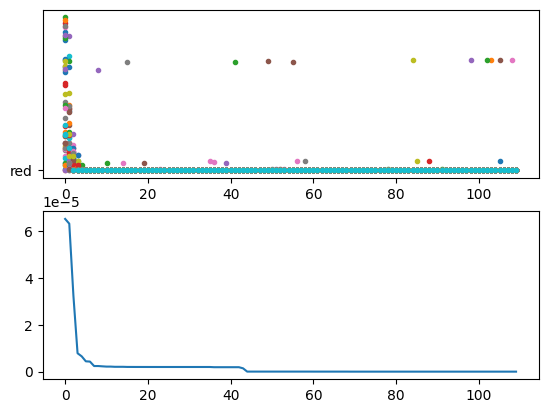

In [32]:
from sko.GA import GA
import numpy as np
def ga_func(x):
        p = np.square(x[0]) + np.square(x[1]) 
        return 0.5+((np.square(np.sin(p))-0.5)/np.square(1+0.001*p))
'''
    这个函数有很多局部最小值，具有强烈的震荡
    全局最小值在 (0,0) 处，值为 0
'''
ga = GA(
        func=ga_func,
        n_dim=2,
        size_pop=50,
        max_iter=110,
        lb=[-1,-1],
        ub=[1,1],
        prob_mut=0.001, #发生变异的概率
        precision=1e-7 #精度的控制
)
bestx_ga, besty_ga = ga.run()
print(bestx_ga, besty_ga)
import matplotlib.pyplot as plt
import pandas as pd
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2,1)
ax[0].plot(Y_history.index , Y_history.values,'.','red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

粒子群算法

[0.         0.05000003 0.5       ] [0.25]


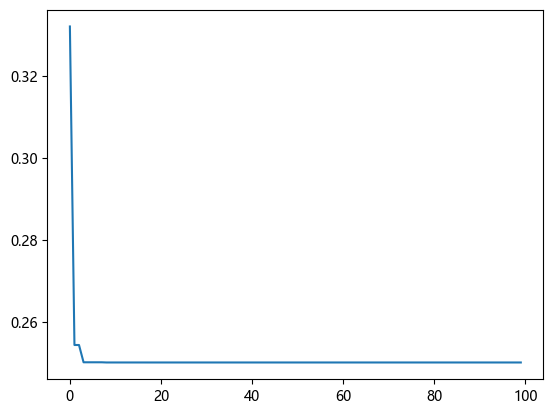

In [75]:
from sko.PSO import PSO
def demo_func(x):
        x1, x2, x3 = x
        return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2
pso = PSO(func=demo_func,
          n_dim=3,
          pop=50,
          max_iter=100,
          lb=[0,-1,0.5],
          ub=[1,1,1],
          w = 0.8,
          c1 = 0.5,
          c2 = 0.5
          )
pso.run()
print(pso.gbest_x, pso.gbest_y)
import matplotlib.pyplot as plt
plt.plot(pso.gbest_y_hist)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.show()

模拟退火算法

In [72]:
from sko.SA import SA
sa = SA(
    func=demo_func,
    x0=[0,0,0], #初始解向量
    T_max=1,
    T_min=1e-9,
    L=300, #每个温度下的迭代次数，即在降低温度之前尝试改进解的次数
    max_iter=150 # 最大迭代次数，如果达到这个次数，则算法终止
)
bestx_sa,besty_sa = sa.run()
print(bestx_sa, besty_sa)

[1.98103798e-05 5.00042241e-02 1.55416165e-05] 6.518356727000714e-10


PSO 是一种基于群体的随机搜索算法，通常在全局搜索上表现不错，但可能在局部精细化上不如模拟退火。
SA 是一种基于模拟物理退火过程的算法，善于跳出局部最优，并在一定的迭代次数内收敛到更接近全局最优的解。

蚁群算法

In [ ]:
import numpy as np
from sko.ACA import ACA_TSP

# 定义距离矩阵
city = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([city[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


aca = ACA_TSP(func=cal_total_distance, n_dim=4, size_pop=50, max_iter=100, distance_matrix=city)
best_x, best_y = aca.run()
print('best route:', best_x)
print('best distance:', best_y)
#封装的函数无法运行 

免疫优化算法

In [92]:
from sko.IA import IA_TSP
ia_tsp = IA_TSP(func=cal_total_distance,
                n_dim=4, 
                size_pop=500,
                max_iter=800,
                prob_mut=0.2,
                T=0.7, 
                alpha=0.95)
best_points, best_distance = ia_tsp.run()
print('best routine:', best_points, 'best_distance:', best_distance)

best routine: [3 2 0 1] best_distance: [80]


人工鱼群算法

In [93]:
from sko.AFSA import AFSA

def func(x):
    x1, x2 = x
    return 1 / x1 ** 2 + x1 ** 2 + 1 / x2 ** 2 + x2 ** 2

afsa = AFSA(func, n_dim=2, size_pop=50, max_iter=300,
            max_try_num=100, step=0.5, visual=0.3,
            q=0.98, delta=0.5)
best_x, best_y = afsa.run()
print(best_x, best_y)

[0.99999341 0.99997953] 4.000000001850417
